In [1]:
#!pip install requests beautifulsoup4 pillow 
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import time

# Web Scraping a Wikipedia Page

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BBM_66IJHjdCPOkk-ocrYNu87vnAawJK?usp=sharing)

## Scraping Headers and Links 

In [2]:
# Specify a user agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Replace this URL with your Wikipedia link
url = 'https://en.wikipedia.org/wiki/Python_(programming_language)'

'''
!!! Be mindful of running any cell with the "get" function too many times in a short period of time.
'''
# Fetch the webpage with user agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
response

<Response [200]>

In [4]:
# Find all headers
headers = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
print("\nHeaders found on the page:")
for header in headers:
    print(header.text)


Headers found on the page:
Contents
Python (programming language)
History
Design philosophy and features
Syntax and semantics
Indentation
Statements and control flow
Expressions
Methods
Typing
Arithmetic operations
Function syntax
Programming examples
Libraries
Development environments
Implementations
Reference implementation
Other implementations
No longer supported implementations
Cross-compilers to other languages
Performance
Development
API documentation generators
Naming
Popularity
Uses
Languages influenced by Python
See also
References
Sources
Further reading
External links


In [5]:
# Find all links
links = [a['href'] for a in soup.find_all('a', href=True) if a['href'].startswith('http')]
print("Links found on the page:")
print(links[:5])  # Display only the first 5 for brevity

Links found on the page:
['https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en', 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en', 'https://af.wikipedia.org/wiki/Python_(programmeertaal)', 'https://als.wikipedia.org/wiki/Python_(Programmiersprache)', 'https://ar.wikipedia.org/wiki/%D8%A8%D8%A7%D9%8A%D8%AB%D9%88%D9%86_(%D9%84%D8%BA%D8%A9_%D8%A8%D8%B1%D9%85%D8%AC%D8%A9)']


## Scraping Images

In [6]:
# Specify a user agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Replace this URL with your Wikipedia link
url = 'https://en.wikipedia.org/wiki/Los_Angeles_Dodgers'

'''
!!! Be mindful of running any cell with the "get" function too many times in a short period of time.
'''
# Fetch the webpage with user agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
response

<Response [200]>

In [8]:
# Find all images
images = soup.find_all('img')
images[0]

<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>

**Our image link is nested! We need to do access the link using the "src" property.**

In [9]:
# Get image paths from src
img_links = []
for img in images:
    img_src = img['src']
    img_links.append(img_src)
img_links[0:5]

['/static/images/icons/wikipedia.png',
 '/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 '/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/33px-Baseball_current_event.svg.png']

**Let's only keep PNGs since they are easy to plot.**

In [10]:
img_links = [link for link in img_links if link[-4:] == ".png"]
img_links[0:5]

['/static/images/icons/wikipedia.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/33px-Baseball_current_event.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Los_Angeles_Dodgers_Logo.svg/96px-Los_Angeles_Dodgers_Logo.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/LA_Dodgers.svg/100px-LA_Dodgers.svg.png']

**Let's remove anything with the word "static" in the path. These are images that are reused all over the website.**

In [11]:
img_links = [link for link in img_links if "/static/" not in link]
img_links[0:5]

['//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/33px-Baseball_current_event.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Los_Angeles_Dodgers_Logo.svg/96px-Los_Angeles_Dodgers_Logo.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/LA_Dodgers.svg/100px-LA_Dodgers.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/e/e5/MLB-NLW-LAD-Uniforms.png/275px-MLB-NLW-LAD-Uniforms.png']

**Good! Our URLs are local paths. They are incomplete. This is a very common problem in webscraping.**

**We need to add the base URL back into the path.**

In [12]:
img_links_clean = []
for link in img_links:
    full_link = "https:"+link
    img_links_clean.append(full_link)
img_links_clean

['https://upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/33px-Baseball_current_event.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Los_Angeles_Dodgers_Logo.svg/96px-Los_Angeles_Dodgers_Logo.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/LA_Dodgers.svg/100px-LA_Dodgers.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/e/e5/MLB-NLW-LAD-Uniforms.png/275px-MLB-NLW-LAD-Uniforms.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/HollywoodStarsCap.png/110px-HollywoodStarsCap.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Dodgersuni.png/220px-Dodgersuni.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Los_Angeles_Dodgers_Script_Logo.svg/220px-Los_Angeles_Dodgers_Script_Logo.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/1/10/

**Let's plot some images!!!**

In [13]:
import matplotlib.pyplot as plt 
import matplotlib.image as img

In [14]:
img_links_clean[0]

'https://upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png'

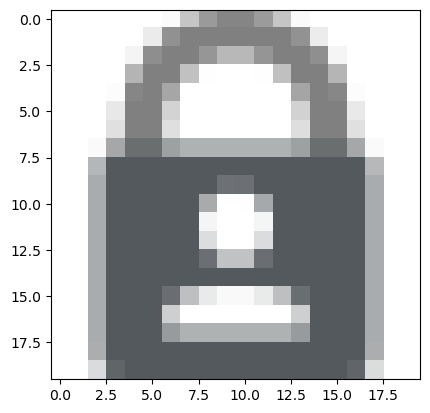

In [15]:
image_url = img_links_clean[0]
im = img.imread(image_url) 
plt.imshow(im) 

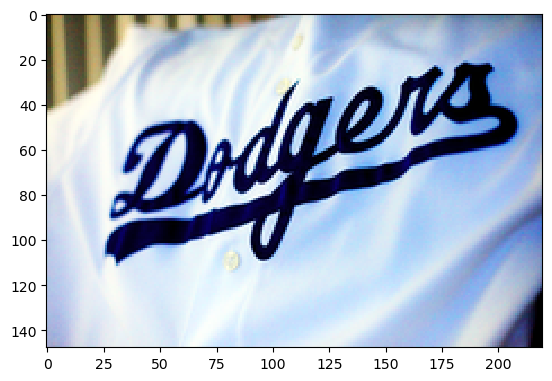

In [16]:
image_url = img_links_clean[6]
im = img.imread(image_url) 
plt.imshow(im) 

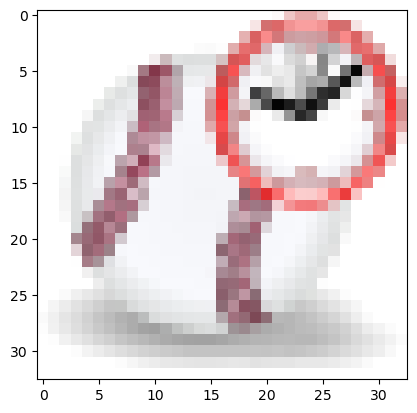

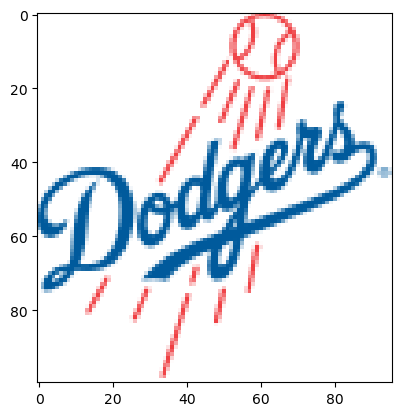

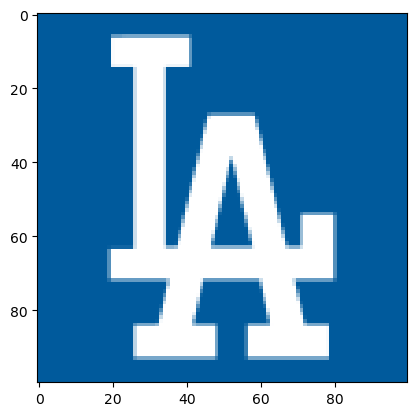

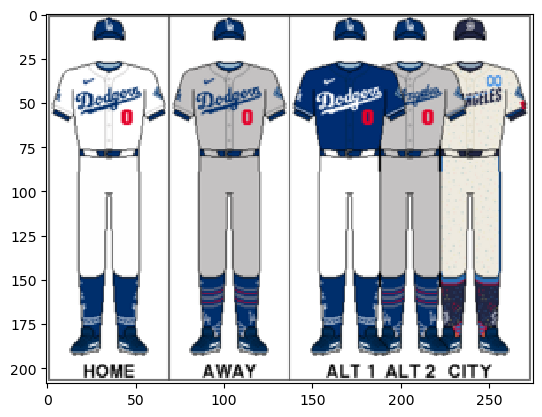

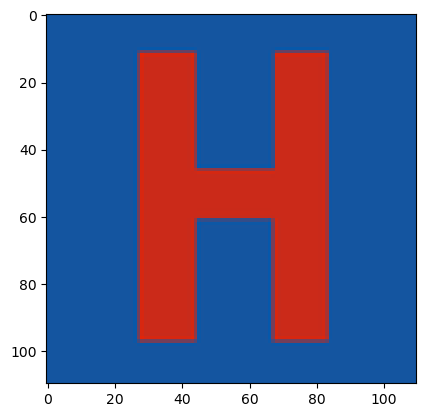

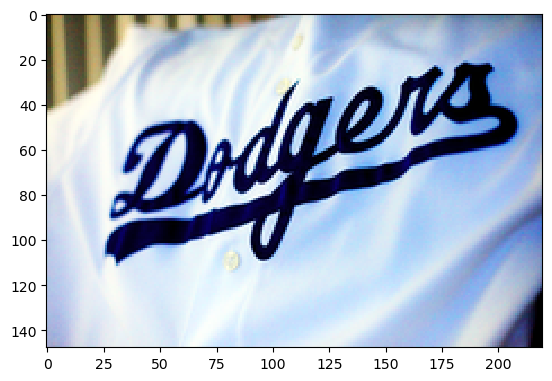

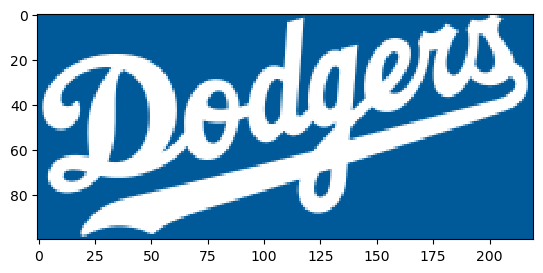

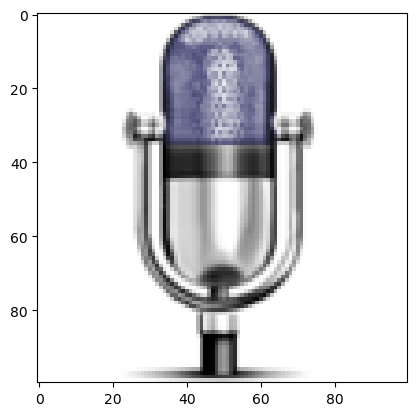

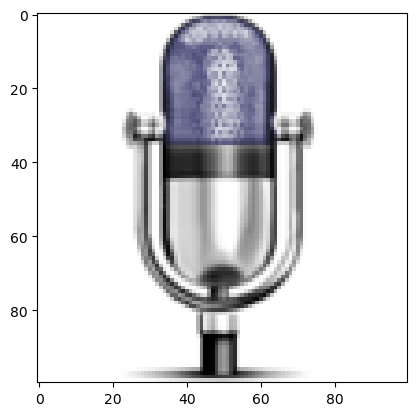

In [17]:
for link in img_links_clean[1:10]:
    im = img.imread(link) 
    plt.imshow(im) 
    plt.show()

## All together

In [18]:
# Specify a user agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Replace this URL with your Wikipedia link
url = 'https://en.wikipedia.org/wiki/Giant_panda'

'''
!!! Be mindful of running any cell with the "get" function too many times in a short period of time.
'''
# Fetch the webpage with user agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
response

<Response [200]>

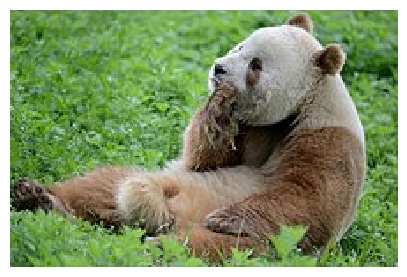

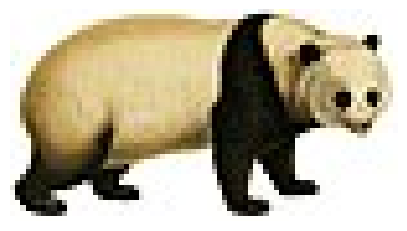

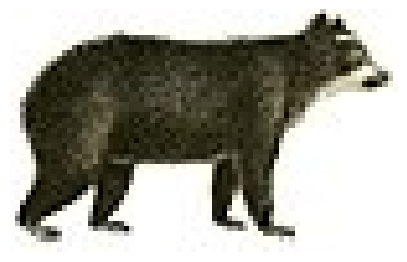

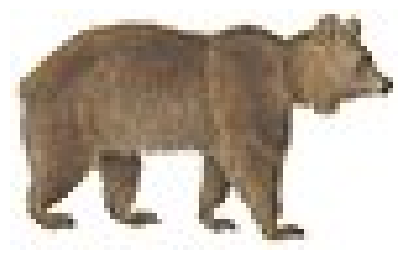

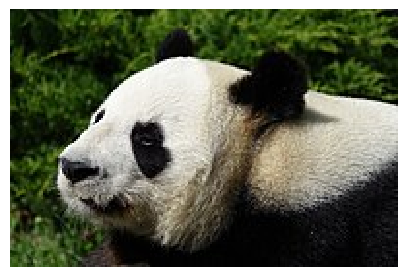

In [19]:
# Find all images
images = soup.find_all('img')

# Get image paths from src
img_links = []
for img in images:
    img_src = img['src']
    img_links.append(img_src)

# Filter only file types you want
img_links = [link for link in img_links if link[-4:] in [".jpg"]]
img_links = [link for link in img_links if "/static/" not in link]

# Clean and correct links
img_links_clean = []
for link in img_links[0:5]:
    full_link = "https:"+link
    img_links_clean.append(full_link)
    
    '''!!! Very important to add wait times if using requests in a loop.'''
    time.sleep(2)
    response = requests.get(full_link)
    image = Image.open(BytesIO(response.content))
    
    plt.figure(figsize=(5, 5))  # Set the figure size as needed
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    #plt.title(f'{full_link}')  
    plt.show()

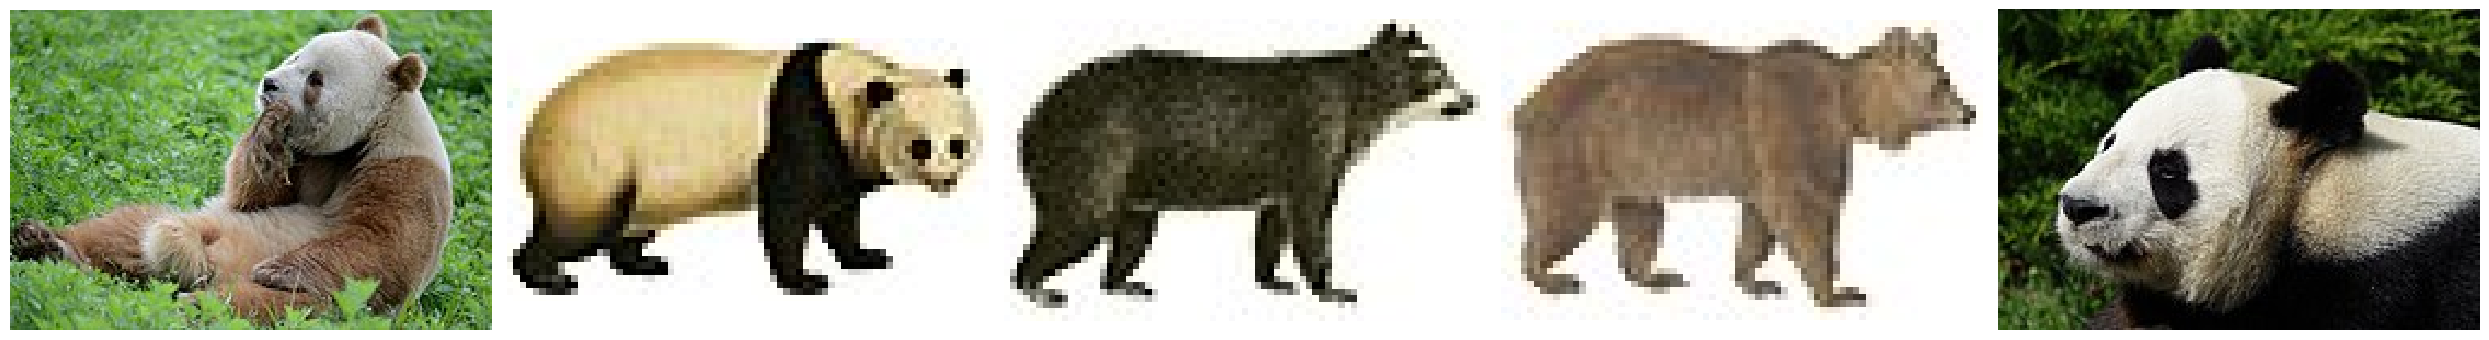

In [20]:
# Set up the plot
num_images = len(img_links_clean)
fig, axs = plt.subplots(1, num_images, figsize=(5 * num_images, 5))  # Adjust figure size as needed

# Make sure axs is iterable by converting to an array if there's only one image
if num_images == 1:
    axs = [axs]

# Loop through the image URLs and display each one
for ax, url in zip(axs, img_links_clean):
    '''!!! Very important to add wait times if using requests in a loop.'''
    time.sleep(2)
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    ax.imshow(image)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()